In [192]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [193]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [194]:
data = pd.read_csv('data/Finaltrain.csv')
data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


In [195]:
# randomize data
data = data.sample(frac=1).reset_index(drop=True) # Mezclar los datos

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,448e68637138,ebad26,Some of the ways the factory would cover up sp...,1.530847,0.071051,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,1084,208,0,35,100
1,3cd258671166,3b9047,It was hard for the people to pay taxes becua...,-1.427883,-0.790667,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,153,31,0,2,15
2,7f09d9ceac6c,39c16e,One element of a tragedy is a complex plot. It...,-0.921625,-1.213611,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,155,28,0,3,13
3,3ba16640478a,39c16e,One of the first notions of tragedy Aristo...,0.205683,0.380538,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,367,66,0,4,32
4,f06668e3066c,ebad26,The meat for canning and sausage was piled on ...,-0.140912,-0.245279,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,314,53,0,9,17


## Preprocesamiento

In [196]:
# normalizar variables numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']] = scaler.fit_transform(data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']])

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,448e68637138,ebad26,Some of the ways the factory would cover up sp...,1.530847,0.071051,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,0.253528,0.2976,0.0,0.222930,0.335570
1,3cd258671166,3b9047,It was hard for the people to pay taxes becua...,-1.427883,-0.790667,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.010193,0.0144,0.0,0.012739,0.050336
2,7f09d9ceac6c,39c16e,One element of a tragedy is a complex plot. It...,-0.921625,-1.213611,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,0.010716,0.0096,0.0,0.019108,0.043624
3,3ba16640478a,39c16e,One of the first notions of tragedy Aristo...,0.205683,0.380538,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,0.066127,0.0704,0.0,0.025478,0.107383
4,f06668e3066c,ebad26,The meat for canning and sausage was piled on ...,-0.140912,-0.245279,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,0.052274,0.0496,0.0,0.057325,0.057047


In [197]:
tokenizer = Tokenizer(num_words=10000)  # Limitar a las 10,000 palabras más comunes
tokenizer.fit_on_texts(data['text'] + ' ' + data['prompt_text'])

In [198]:
sequences = tokenizer.texts_to_sequences(data['text'] + ' ' + data['prompt_text'])

In [199]:
maxlen = 200  # Puedes ajustar este valor según la longitud promedio
X = pad_sequences(sequences, maxlen=maxlen)

In [200]:
# Combinar las etiquetas en una matriz
y = data[['content', 'wording']].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Separar las etiquetas después de la división
y_content_train = y_train[:, 0]
y_wording_train = y_train[:, 1]
y_content_test = y_test[:, 0]
y_wording_test = y_test[:,1]

## RNN

In [202]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout


In [203]:
input_ = Input(shape=(maxlen,))

x = Embedding(input_dim=10000, output_dim=128, input_length=maxlen)(input_)

x = LSTM(256, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [204]:
# Predicción de content
content_output = Dense(1, activation='linear', name='content')(x)

# Predicción de wording
wording_output = Dense(1, activation='linear', name='wording')(x)

In [205]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = ['mse', 'mse']
epochs = 15
batch_size = 256

In [206]:
model = Model(inputs=input_, outputs=[content_output, wording_output])
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [207]:
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 200, 128)  │  1,280,000 │ input_layer_11[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_23 (LSTM)      │ (None, 200, 256)  │    394,240 │ embedding_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 200, 256)  │          0 │ lstm_23[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_24 (LSTM)      │ (None, 200, 128)  │    197,120 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 200, 128)  │          0 │ lstm_24[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_25 (LSTM)      │ (None, 64)        │     49,408 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │      4,160 │ lstm_25[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 64)        │          0 │ dense_14[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 32)        │      2,080 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ content (Dense)     │ (None, 1)         │         33 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wording (Dense)     │ (None, 1)         │         33 │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,927,074 (7.35 MB)

 Trainable params: 1,927,074 (7.35 MB)

 Non-trainable params: 0 (0.00 B)

In [208]:
history = model.fit(
    X_train, 
    [y_content_train, y_wording_train], 
    validation_data=(X_test, [y_content_test, y_wording_test]), 
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/15
23/23 - 30s - 1s/step - content_mse: 0.7153 - loss: 1.5767 - wording_mse: 0.8614 - val_content_mse: 0.3673 - val_loss: 1.0184 - val_wording_mse: 0.6512
Epoch 2/15
23/23 - 27s - 1s/step - content_mse: 0.3651 - loss: 0.9584 - wording_mse: 0.5933 - val_content_mse: 0.2937 - val_loss: 0.7999 - val_wording_mse: 0.5062
Epoch 3/15
23/23 - 25s - 1s/step - content_mse: 0.3018 - loss: 0.7919 - wording_mse: 0.4901 - val_content_mse: 0.2591 - val_loss: 0.7005 - val_wording_mse: 0.4414
Epoch 4/15
23/23 - 25s - 1s/step - content_mse: 0.2670 - loss: 0.6879 - wording_mse: 0.4209 - val_content_mse: 0.2784 - val_loss: 0.7357 - val_wording_mse: 0.4573
Epoch 5/15
23/23 - 25s - 1s/step - content_mse: 0.2731 - loss: 0.6774 - wording_mse: 0.4044 - val_content_mse: 0.2843 - val_loss: 0.7434 - val_wording_mse: 0.4591
Epoch 6/15
23/23 - 26s - 1s/step - content_mse: 0.2510 - loss: 0.6061 - wording_mse: 0.3552 - val_content_mse: 0.2399 - val_loss: 0.6550 - val_wording_mse: 0.4151
Epoch 7/15
23/23 - 26s

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_content_pred, y_wording_pred = model.predict(X_test)

print('MAE content:', mean_absolute_error(y_content_test, y_content_pred))
print('MSE content:', mean_squared_error(y_content_test, y_content_pred))
print('R2 content:', r2_score(y_content_test, y_content_pred))

print('\nMAE wording:', mean_absolute_error(y_wording_test, y_wording_pred))
print('MSE wording:', mean_squared_error(y_wording_test, y_wording_pred))
print('R2 wording:', r2_score(y_wording_test, y_wording_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step
MAE content: 0.3866062588006639
MSE content: 0.2668106966599793
R2 content: 0.7505815573340355

MAE wording: 0.523816956362072
MSE wording: 0.4792820808934037
R2 wording: 0.5644477790713032


In [210]:
import matplotlib.pyplot as plt

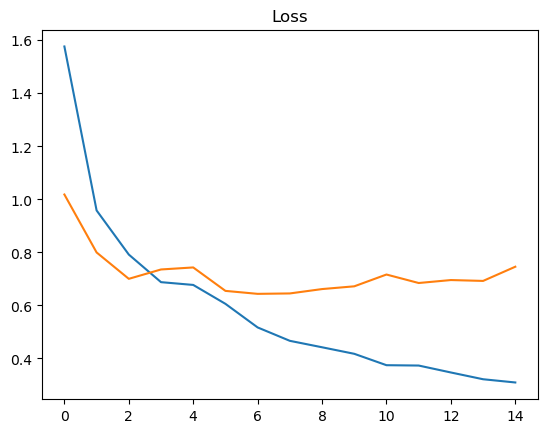

In [211]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

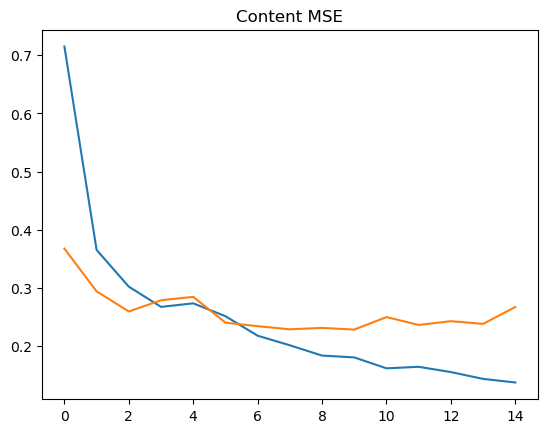

In [212]:
plt.plot(history.history['content_mse'])
plt.plot(history.history['val_content_mse'])
plt.title('Content MSE')
plt.show()

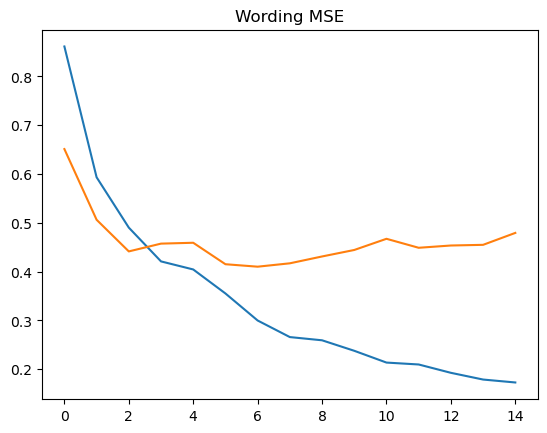

In [213]:
plt.plot(history.history['wording_mse'])
plt.plot(history.history['val_wording_mse'])
plt.title('Wording MSE')
plt.show()